In [78]:
import pandas as pd

In [79]:
wines_data = pd.read_csv('/content/winequality-red.csv')
wines_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [80]:
wines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [81]:
wines_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [82]:
wines_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<BarContainer object of 6 artists>

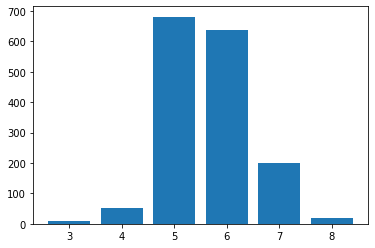

In [83]:
import matplotlib.pyplot as plt
counts = wines_data['quality'].value_counts()
plt.bar(counts.index,counts.values)

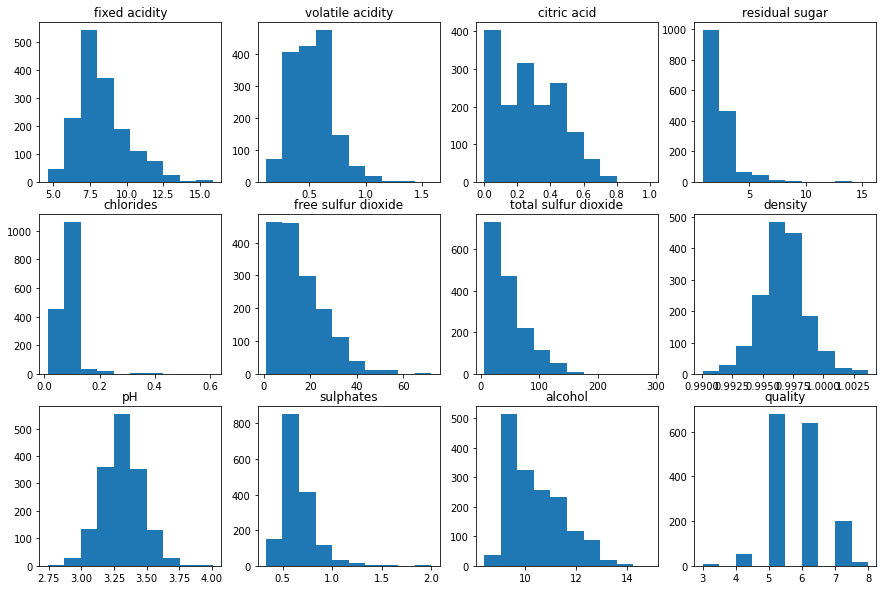

In [86]:
i = 1
plt.figure(figsize=(15,10))

for column in wines_data.columns:
  plt.subplot(3,4,i)
  plt.title(column)
  plt.hist(wines_data[column])
  if i < wines_data.shape[1]:
    i += 1

In [87]:
wines_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [88]:
def relabel(x):
  if x <=5 :
    label = 'bad'
  else:
    label = 'good'
  return label

wines_data['taste'] = wines_data['quality'].apply(lambda x : relabel(x))

In [89]:
wines_data['taste'].value_counts()

good    855
bad     744
Name: taste, dtype: int64

<BarContainer object of 1599 artists>

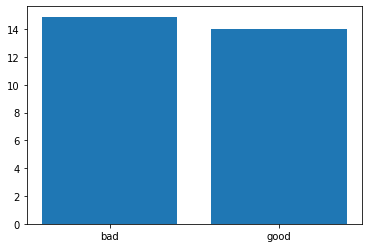

In [92]:
plt.bar(x = wines_data['taste'], height = wines_data['alcohol'])

In [116]:
X = wines_data.drop(labels = ['quality','taste'], axis = 1)
y = wines_data['taste']

In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [120]:
from sklearn.linear_model import LogisticRegression
ls = LogisticRegression(solver='liblinear',max_iter=1000)
ls.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
y_pred = ls.predict(X_test)
y_pred

array(['bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good',
       'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'good', 'bad',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [123]:
accuracy_score(y_test,y_pred)

0.740625

In [124]:
confusion_matrix(y_test,y_pred)

array([[105,  36],
       [ 47, 132]])

In [125]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.69      0.74      0.72       141
        good       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [126]:
from sklearn.model_selection import cross_val_score

cross_val_score(ls, X_train, y_train, cv = 10).mean()

0.7435716043307087